### Predictive modelling with Python

*Jure Žabkar*

*Wed, 5 March 2025*

---

### Importing data
(Help on [csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table) and [excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader))

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/shapes.csv')

In [2]:
data

,color,outline,dot,shape
0,green,dashed,no,▲
1,green,dashed,yes,▲
2,yellow,dashed,no,■
3,red,dashed,no,■
4,red,solid,no,■
5,red,solid,yes,▲
6,green,solid,no,■
7,green,dashed,no,▲
8,yellow,solid,yes,■
9,red,solid,no,■


In [3]:
data.head()

,color,outline,dot,shape
0,green,dashed,no,▲
1,green,dashed,yes,▲
2,yellow,dashed,no,■
3,red,dashed,no,■
4,red,solid,no,■


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   color    15 non-null     object
 1   outline  15 non-null     object
 2   dot      15 non-null     object
 3   shape    15 non-null     object
dtypes: object(4)
memory usage: 612.0+ bytes


In [5]:
data.describe()

,color,outline,dot,shape
count,15,15,15,15
unique,3,2,2,2
top,green,dashed,no,■
freq,6,8,9,9


<Axes: xlabel='color', ylabel='shape'>

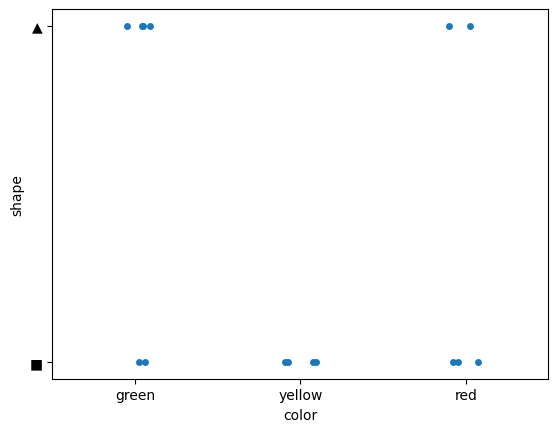

In [6]:
sns.stripplot(x='color', y='shape', data=data)

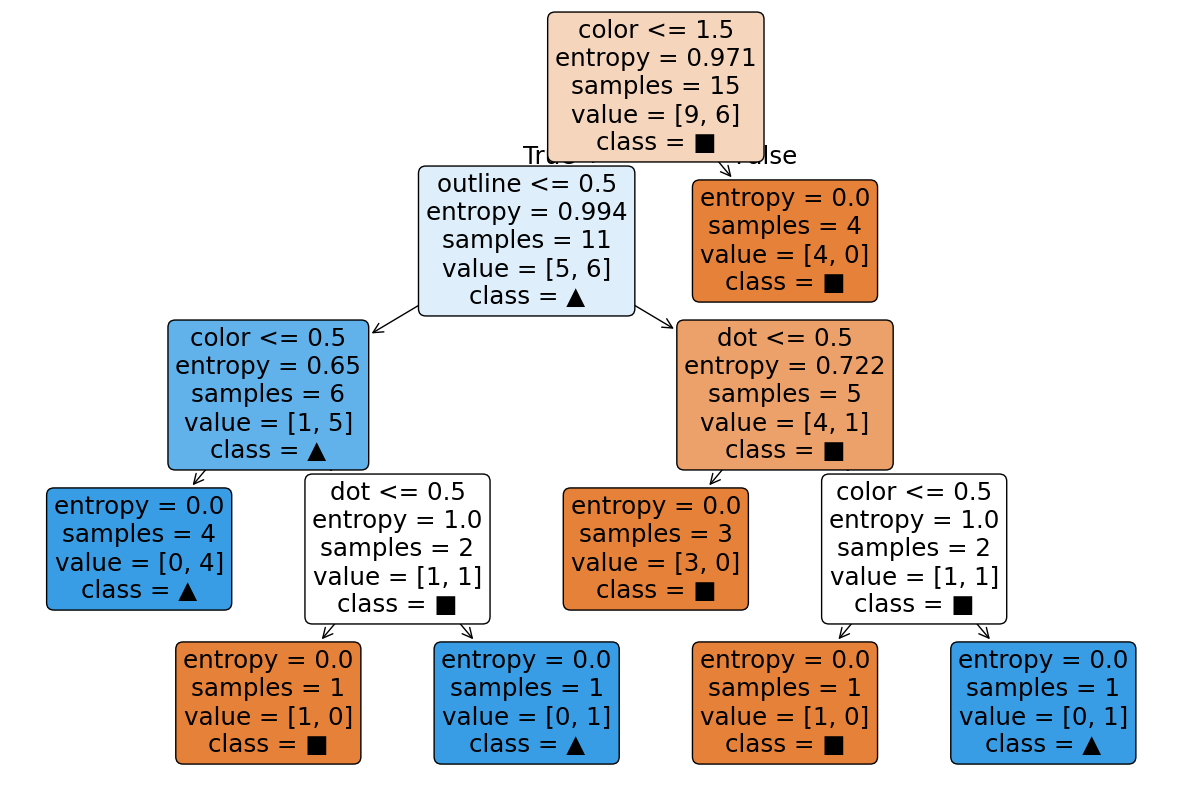

In [7]:
# Separate features and target
X = data.drop("shape", axis=1)
y = data["shape"]

# Encode categorical features
feature_encoder = LabelEncoder()
for column in X.columns:
    X[column] = feature_encoder.fit_transform(X[column])

# Encode the target and keep track of original labels
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
class_names = target_encoder.classes_

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y_encoded)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=list(X.columns), class_names=list(class_names), filled=True, rounded=True)
#plt.title("Decision Tree with Original Class Labels")
plt.show()

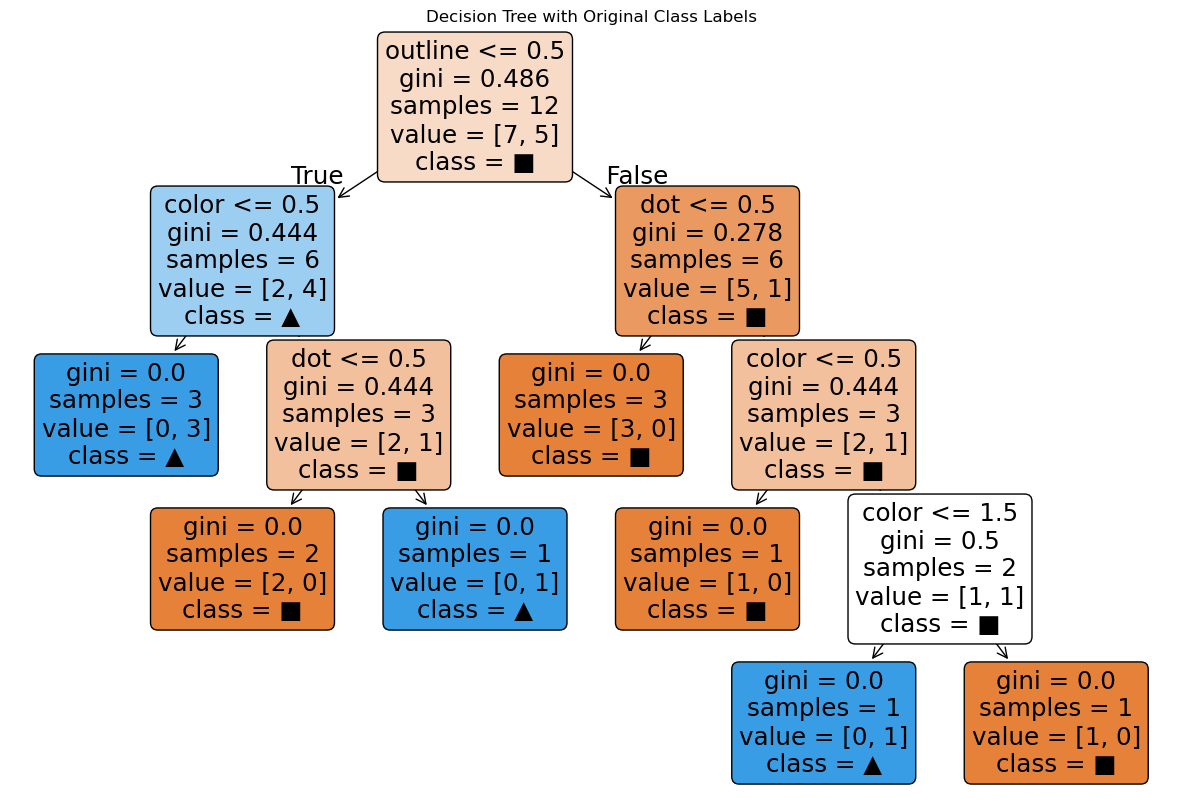

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(clf,feature_names=list(X.columns), class_names=list(class_names), filled=True, rounded=True)
plt.title("Decision Tree with Original Class Labels")
plt.show()